In [2]:
!pip install scikit-learn

# Data Preprocessing
The Wine dataset is a classic dataset in machine learning and statistics.

### Overview:

- Number of Instances: 178
- Number of Features: 13 numeric features which represent various chemical properties of wines
- Target Variable: Three classes of wines (class 0, class 1, and class 2)

### Features:

1. Alcohol: Alcohol content in the wine (measured in % v/v)
2. Malic Acid: Malic acid content in the wine (measured in g/l)
3. Ash: Ash content in the wine (measured in g/l)
4. Alcalinity of Ash: A measure of the alkalinity of the ash (measured in g/l)
5. Magnesium: Magnesium content in the wine (measured in mg/l)
6. Total Phenols: Total phenolic content in the wine (measured in mg/l)
7. Flavanoids: Flavanoid content in the wine (measured in mg/l)
8. Nonflavanoid Phenols: Nonflavanoid phenolic content in the wine (measured in mg/l)
9. Proanthocyanins: Proanthocyanidin content in the wine (measured in mg/l)
10. Color Intensity: Intensity of color in the wine (measured as absorbance at 420 nm)
11. Hue: Hue of the wine, representing the color (dimensionless)
12. OD280/OD315 of diluted wines:** Ratio of optical densities (unitless)
13. Proline: Proline content in the wine (measured in mg/l)

### Classes:

The target variable consists of three classes representing different types of wines:

- Class 0: Wines of the first type
- Class 1: Wines of the second type
- Class 2: Wines of the third type

### Dataset Source:

The Wine dataset is one of the built-in datasets in scikit-learn and was originally collected by Forina, M. et al. in their research work. It's often used for practicing classification algorithms and techniques in machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [3]:
wine = datasets.load_wine()

X = wine.data
y = wine.target

df = pd.DataFrame(data = X, columns = wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
min_max_values = df.describe().loc[['min','max']]
min_max_values

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
min,11.03,0.74,1.36,10.6,70.0,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.0
max,14.83,5.80,3.23,30.0,162.0,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.0


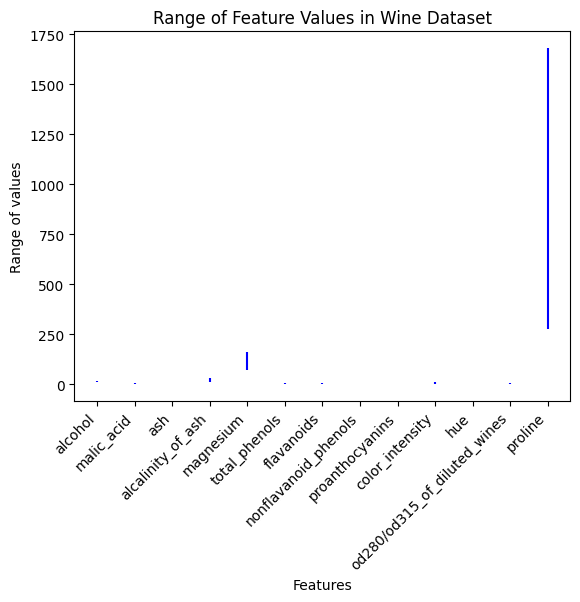

In [12]:

for feature in df.columns:
  plt.vlines(x = feature, ymin = min_max_values[feature]['min'], ymax = min_max_values[feature]['max'], color = 'blue')

plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Features')
plt.ylabel('Range of values')
plt.title('Range of Feature Values in Wine Dataset')
plt.show()



In [8]:
min_max_values['ash']['min']

1.36

In [13]:
scaler = StandardScaler()
X_standardised = scaler.fit_transform(X)
X_standardised

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [14]:
df_scaled = pd.DataFrame(data = X_standardised, columns = wine.feature_names)
df_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [16]:
min_max_values_scaled = df_scaled.describe().loc[['min','max']]
min_max_values_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
min,-2.434235,-1.432983,-3.679162,-2.671018,-2.088255,-2.107246,-1.695971,-1.868234,-2.069034,-1.634288,-2.094732,-1.895054,-1.493188
max,2.259772,3.109192,3.156325,3.154511,4.371372,2.539515,3.062832,2.402403,3.485073,3.435432,3.301694,1.960915,2.971473


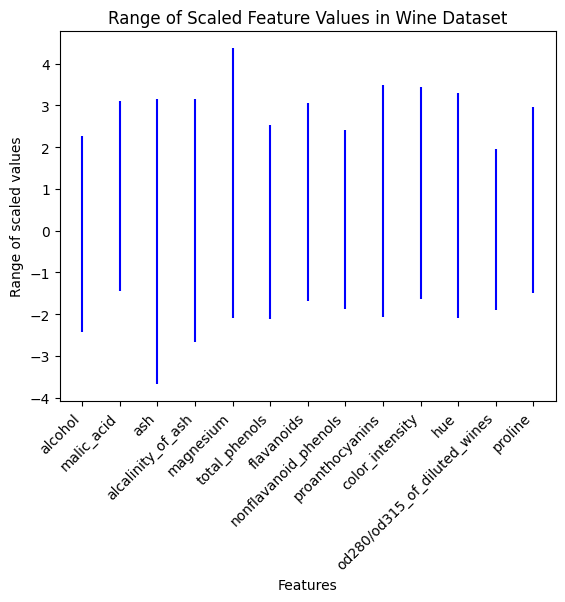

In [17]:

for feature in df_scaled.columns:
  plt.vlines(x = feature, ymin = min_max_values_scaled[feature]['min'], ymax = min_max_values_scaled[feature]['max'], color = 'blue')

plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Features')
plt.ylabel('Range of scaled values')
plt.title('Range of Scaled Feature Values in Wine Dataset')
plt.show()

